# Defuzzification Methods

This example shows how to display five defuzzification methods supported in the fuzzylab library.

## Problem Setup

Suppose you have the following region to be defuzzified. What are some of the methods you might choose?

In [1]:
!pip install -U fuzzylab

Requirement already up-to-date: fuzzylab in /home/eduardo/py37/lib/python3.7/site-packages (0.0.2)


In [2]:
%matplotlib inline

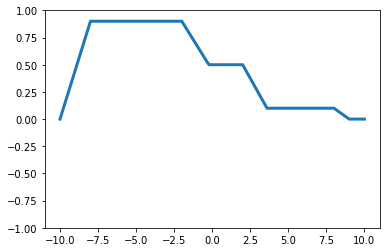

In [3]:
import numpy as np
from matplotlib.pyplot import plot, ylim, show, vlines, text
from fuzzylab import linspace, trapmf, defuzz

x = linspace(-10, 0.1, 10)

mf1 = trapmf(x,[-10, -8, -2, 2])
mf2 = trapmf(x,[-5, -3, 2, 4])
mf3 = trapmf(x,[2, 3, 8, 9])
mf1 = np.maximum(0.5 * mf2, np.maximum(0.9 * mf1, 0.1 * mf3))

plot(x, mf1, lineWidth=3)
ylim(-1, 1)
show()

## Centroid

Centroid defuzzification returns the center of area under the curve. If you think of the area as a plate of equal density, the centroid is the point along the x axis about which this shape would balance.

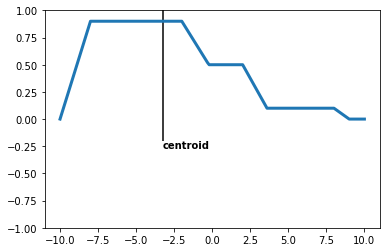

In [4]:
x1 = defuzz(x, mf1, 'centroid')
vlines(x1, -0.2, 1.2, color='k')
text(x1, -0.27, 'centroid', fontweight='bold')

plot(x, mf1, lineWidth=3)
ylim(-1, 1)
show()

## Bisector

The bisector is the vertical line that will divide the region into two sub-regions of equal area. It is sometimes, but not always coincident with the centroid line.

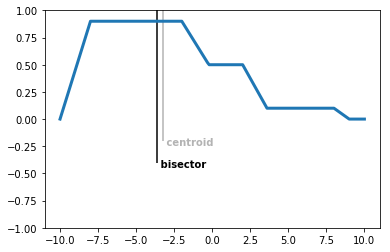

In [5]:
x2 =defuzz(x, mf1, 'bisector')

gray = [x*0.7 for x in [1, 1, 1]]
vlines(x1, -0.2, 1.2, color=gray)
text(x1, -0.24, ' centroid', fontweight='bold', color=gray)

vlines(x2, -0.4, 1.2, color='k')
text(x2, -0.44, ' bisector', fontweight='bold')

plot(x, mf1, lineWidth=3)
ylim(-1, 1)
show()

## Middle, Smallest, and Largest of Maximum

MOM, SOM, and LOM stand for Middle, Smallest, and Largest of Maximum, respectively. These three methods key off the maximum value assumed by the aggregate membership function. In this example, because there is a plateau at the maximum value, they are distinct. If the aggregate membership function has a unique maximum, then MOM, SOM, and LOM all take on the same value.

In [6]:
x3 = defuzz(x, mf1, 'mom')
print(x3)

-5.0


In [7]:
x4 = defuzz(x, mf1, 'som')
print(x4)

-8.0


In [8]:
x5 = defuzz(x, mf1, 'lom')
print(x5)

-2.0


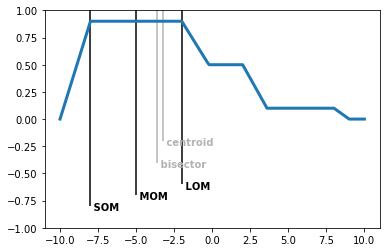

In [9]:
vlines(x1, -0.2, 1.2, color=gray)
text(x1, -0.24, ' centroid', fontweight='bold', color=gray)
vlines(x2, -0.4, 1.2, color=gray)
text(x2, -0.44, ' bisector', fontweight='bold', color=gray)

vlines(x3, -0.7, 1.2, color='k')
text(x3, -0.74, ' MOM', fontweight='bold')
vlines(x4, -0.8, 1.2, color='k')
text(x4, -0.84, ' SOM', fontweight='bold')
vlines(x5, -0.6, 1.2, color='k')
text(x5, -0.64, ' LOM', fontweight='bold')

plot(x, mf1, lineWidth=3)
ylim(-1, 1)
show()

## Picking a Method

Which of these methods is the right one? There's no simple answer. But if you want to get started quickly, generally the centroid method is good enough. Later you can always change your defuzzification method to see if another method works better.

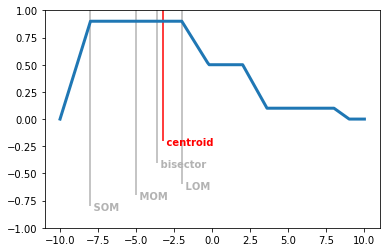

In [10]:
vlines(x1, -0.2, 1.2, color='r')
text(x1, -0.24, ' centroid', fontweight='bold', color='r')
vlines(x2, -0.4, 1.2, color=gray)
text(x2, -0.44, ' bisector', fontweight='bold', color=gray)
vlines(x3, -0.7, 1.2, color=gray)
text(x3, -0.74, ' MOM', fontweight='bold', color=gray)
vlines(x4, -0.8, 1.2, color=gray)
text(x4, -0.84, ' SOM', fontweight='bold', color=gray)
vlines(x5, -0.6, 1.2, color=gray)
text(x5, -0.64, ' LOM', fontweight='bold', color=gray)

plot(x, mf1, lineWidth=3)
ylim(-1, 1)
show()